In [1]:
#import basic libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from datetime import datetime

# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
Weekly_df = pd.read_csv("Dataset\\Week_Death_Vac_2Y.csv")

In [3]:
Weekly_df

,Date,Weekly Deaths,Weekly Cases,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
0,2021-01-06,19312,1605482,3.7,0.6,0.0,14273599,12135244,0.0
1,2021-01-13,23376,1708055,5.4,0.9,0.0,21400606,17887626,0.0
2,2021-01-20,21554,1377786,7.5,1.6,0.0,30659826,24752625,0.0
3,2021-01-27,22568,1140548,9.5,2.6,0.0,41078104,31568602,0.0
4,2021-02-03,21188,954622,11.6,4.1,0.0,53260886,38576199,0.0
...,...,...,...,...,...,...,...,...,...
88,2022-09-14,3230,471611,79.6,67.9,48.7,618116882,264176559,36.0
89,2022-09-21,3158,395071,79.7,68.0,48.8,622068616,264564363,37.1
90,2022-09-28,2974,342162,79.8,68.1,48.9,626055729,264942526,38.3
91,2022-10-05,2994,309887,79.9,68.2,49.1,630145435,265329365,39.6


In [4]:
# Create a Linear Regression object
linreg = LinearRegression()

## Predicting Weekly Deaths using Multiple Variables

In [5]:
CovidPredictor = pd.DataFrame(Weekly_df[['PercentOneDose','PercentCompleted','PercentFirstBooster','Administered','PeopleOneOrMore','PercentSeniorBooster']])
CovidWeeklyDeaths = pd.DataFrame(Weekly_df[['Weekly Deaths']])
CovidWeeklyCases = pd.DataFrame(Weekly_df[['Weekly Cases']])

In [6]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(CovidPredictor, CovidWeeklyDeaths, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (69, 1) (69, 6)
Test Set  : (24, 1) (24, 6)


In [7]:
# Summary Statistics for Response
y_train.describe()

,Weekly Deaths
count,69.000000
mean,7653.101449
std,5884.565252
min,1666.000000
25%,2972.000000
50%,5072.000000
75%,11768.000000
max,23376.000000


In [8]:
# Summary Statistics for Predictors
X_train.describe()

,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
count,69.000000,69.000000,69.000000,6.900000e+01,6.900000e+01,69.000000
mean,62.050725,52.495652,23.804348,4.308872e+08,2.060054e+08,8.872464
std,21.446182,20.215511,22.185279,1.806303e+08,7.121625e+07,13.593315
min,3.700000,0.600000,0.000000,1.427360e+07,1.213524e+07,0.000000
25%,55.200000,49.100000,0.000000,3.384457e+08,1.831246e+08,0.000000
50%,70.400000,60.900000,23.900000,4.741720e+08,2.338610e+08,0.800000
75%,77.900000,66.700000,46.700000,5.862289e+08,2.585026e+08,19.700000
max,80.000000,68.200000,49.100000,6.329057e+08,2.655913e+08,40.600000


Intercept of Regression 	: b =  [24667.80307294]
Coefficients of Regression 	: a =  [[-1.38486609e+04  1.10302347e+03  5.96662180e+02 -1.60598830e-04
   4.07916479e-03 -1.05094844e+02]]

             Predictors  Coefficients
0        PercentOneDose -13848.660851
1      PercentCompleted   1103.023466
2   PercentFirstBooster    596.662180
3          Administered     -0.000161
4       PeopleOneOrMore      0.004079
5  PercentSeniorBooster   -105.094844



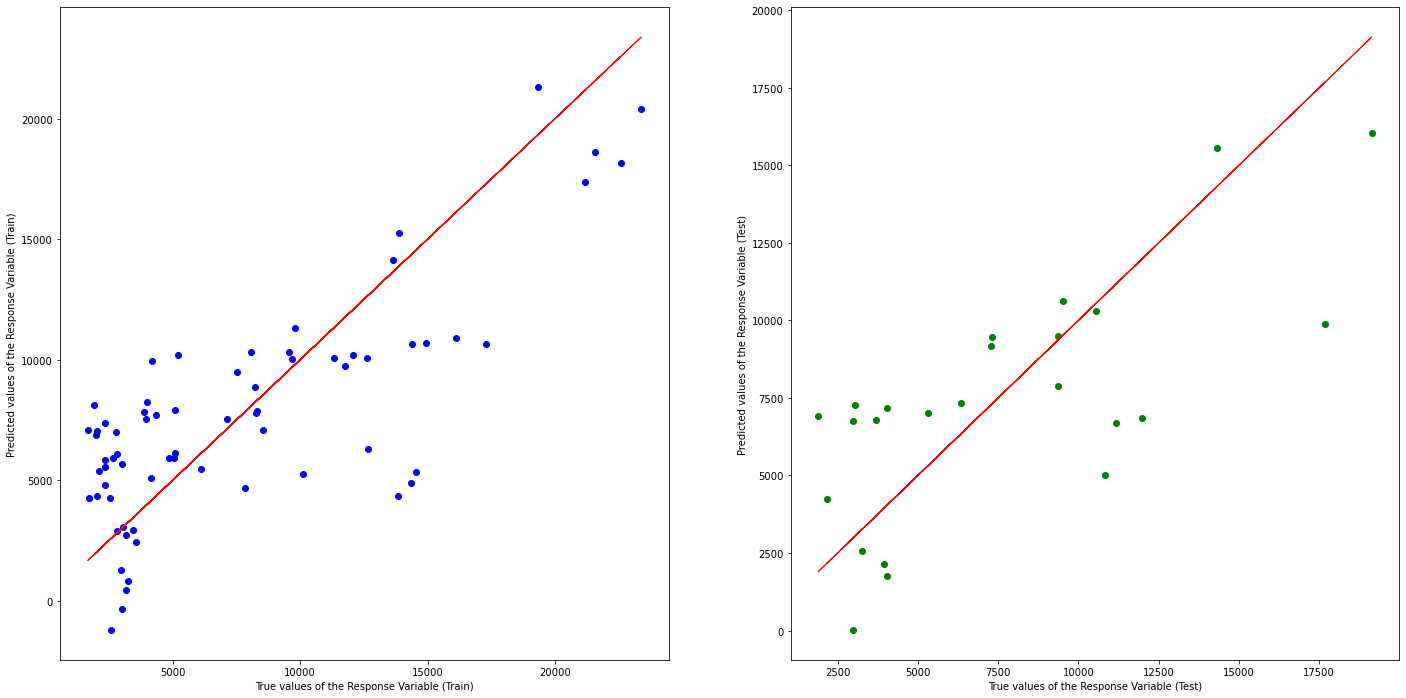

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5989091813854716
Mean Squared Error (MSE) 	: 13687726.17822328

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5110572054434235
Mean Squared Error (MSE) 	: 11130080.065690594



In [9]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [10]:
# Prediction of Weekly Deaths
WeeklyDeaths_pred = Weekly_df[Weekly_df['Date'].isin(['2021-01-06','2021-01-13','2022-10-05','2022-10-12'])]

WeeklyDeaths_pred

,Date,Weekly Deaths,Weekly Cases,PercentOneDose,PercentCompleted,PercentFirstBooster,Administered,PeopleOneOrMore,PercentSeniorBooster
0,2021-01-06,19312,1605482,3.7,0.6,0.0,14273599,12135244,0.0
1,2021-01-13,23376,1708055,5.4,0.9,0.0,21400606,17887626,0.0
91,2022-10-05,2994,309887,79.9,68.2,49.1,630145435,265329365,39.6
92,2022-10-12,2582,265175,80.0,68.2,49.1,632905664,265591330,40.6


In [11]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(WeeklyDeaths_pred[['PercentOneDose','PercentCompleted','PercentFirstBooster','Administered','PeopleOneOrMore','PercentSeniorBooster']])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[21298.90879443],
       [20407.41753722],
       [ -358.05645913],
       [-1222.70853141]])

In [12]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredDeaths"], index = WeeklyDeaths_pred.index)
CovidWeeklyDeaths_acc = pd.concat([WeeklyDeaths_pred[["Date","Weekly Deaths"]], y_pred], axis = 1)

y_errs = 100 * abs(CovidWeeklyDeaths_acc["Weekly Deaths"] - CovidWeeklyDeaths_acc["PredDeaths"]) / CovidWeeklyDeaths_acc["Weekly Deaths"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = WeeklyDeaths_pred.index)
CovidWeeklyDeaths_acc = pd.concat([CovidWeeklyDeaths_acc, y_errs], axis = 1)

CovidWeeklyDeaths_acc

,Date,Weekly Deaths,PredDeaths,Error
0,2021-01-06,19312,21298.908794,10.288467
1,2021-01-13,23376,20407.417537,12.699275
91,2022-10-05,2994,-358.056459,111.959134
92,2022-10-12,2582,-1222.708531,147.355094


## Predicting Weekly Cases using Multiple Variable

In [13]:
X_train, X_test, y_train, y_test = train_test_split(CovidPredictor, CovidWeeklyCases, test_size = 0.25)


# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (69, 1) (69, 6)
Test Set  : (24, 1) (24, 6)


In [14]:
# Summary Statistics for Response
y_train.describe()

,Weekly Cases
count,6.900000e+01
mean,8.208446e+05
std,9.562828e+05
min,8.240500e+04
25%,3.677160e+05
50%,6.149510e+05
75%,8.655970e+05
max,5.589403e+06


Intercept of Regression 	: b =  [1204700.47512961]
Coefficients of Regression 	: a =  [[-2.04384179e+06  1.98834086e+05  1.58461742e+05 -5.69465261e-02
   6.63447537e-01  1.40945827e+04]]

             Predictors  Coefficients
0        PercentOneDose -2.043842e+06
1      PercentCompleted  1.988341e+05
2   PercentFirstBooster  1.584617e+05
3          Administered -5.694653e-02
4       PeopleOneOrMore  6.634475e-01
5  PercentSeniorBooster  1.409458e+04



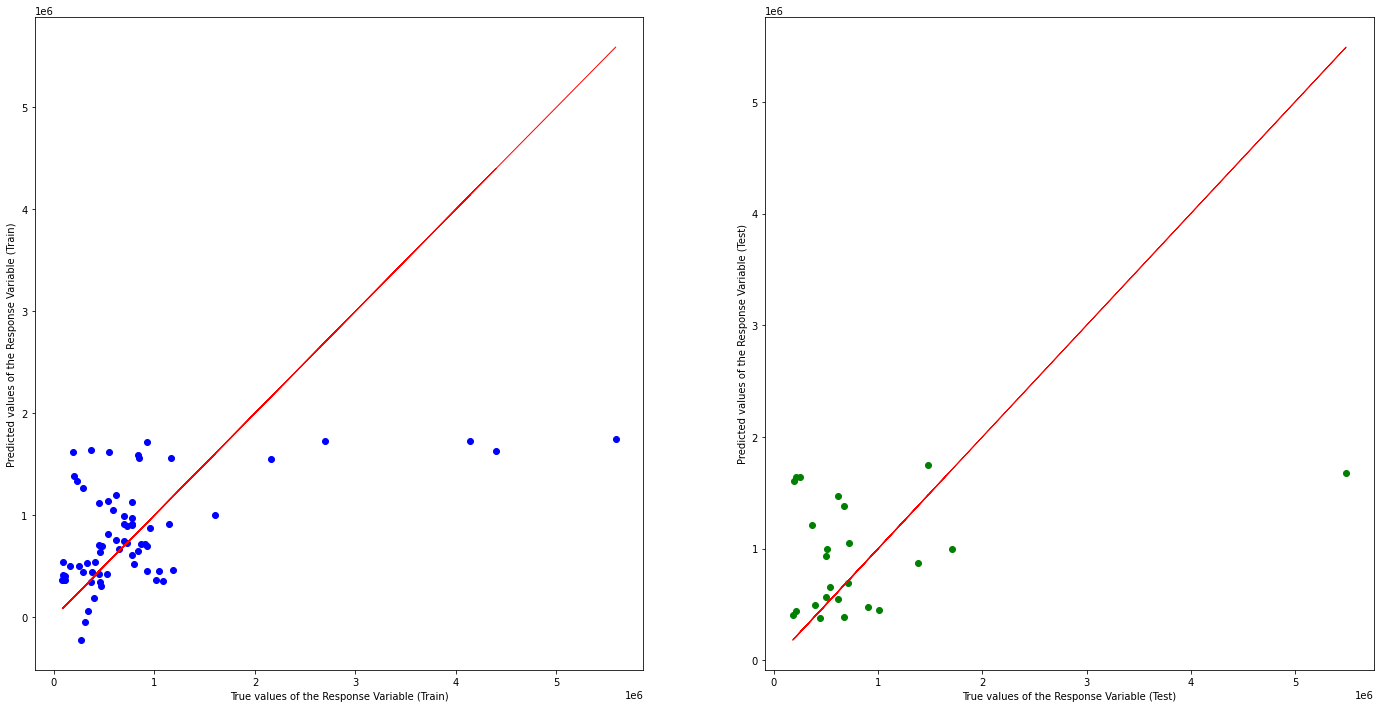

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.2606276485983626
Mean Squared Error (MSE) 	: 666339772393.4949

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.06736629180930753
Mean Squared Error (MSE) 	: 1021910212939.2924



In [15]:
# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [16]:
# Prediction of Weekly Cases
WeeklyCases_pred = Weekly_df[Weekly_df['Date'].isin(['2021-01-06','2021-01-13','2022-10-05','2022-10-12'])]

In [17]:
# Extract Predictors for Prediction
X_pred = pd.DataFrame(WeeklyCases_pred[['PercentOneDose','PercentCompleted','PercentFirstBooster','Administered','PeopleOneOrMore','PercentSeniorBooster']])

# Predict Response corresponding to Predictors
y_pred = linreg.predict(X_pred)
y_pred

array([[1000052.15919117],
       [ 995716.71732504],
       [ -51636.86032998],
       [-225311.87573299]])

In [18]:
# Summarize the Actuals, Predictions and Errors
y_pred = pd.DataFrame(y_pred, columns = ["PredCases"], index = WeeklyCases_pred.index)
CovidWeeklyCases_acc = pd.concat([WeeklyCases_pred[["Date","Weekly Cases"]], y_pred], axis = 1)

y_errs = 100 * abs(CovidWeeklyCases_acc["Weekly Cases"] - CovidWeeklyCases_acc["PredCases"]) / CovidWeeklyCases_acc["Weekly Cases"]
y_errs = pd.DataFrame(y_errs, columns = ["Error"], index = WeeklyCases_pred.index)
CovidWeeklyCases_acc = pd.concat([CovidWeeklyCases_acc, y_errs], axis = 1)

CovidWeeklyCases_acc

,Date,Weekly Cases,PredCases,Error
0,2021-01-06,1605482,1.000052e+06,37.710161
1,2021-01-13,1708055,9.957167e+05,41.704645
91,2022-10-05,309887,-5.163686e+04,116.663126
92,2022-10-12,265175,-2.253119e+05,184.967239
